In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import OneHotEncoder

In [3]:
train_set = pd.read_csv('fashion-mnist_train.csv')
test_set = pd.read_csv('fashion-mnist_test.csv')

In [4]:
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train = train_set.loc[:, train_set.columns != 'label'] 
x_test = test_set.loc[:, test_set.columns != 'label']
y_train = train_set['label']
y_test = test_set['label']

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
enc = OneHotEncoder()

In [9]:
y_train = enc.fit_transform(np.reshape(np.array(y_train), (-1,1))).toarray()
y_test = enc.transform(np.reshape(np.array(y_test), (-1,1))).toarray()

/home/keddad/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Логистическая регрессия

In [10]:
log_checkpoint = ModelCheckpoint(
    'lin_reg.h5',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    monitor='val_accuracy'
)

model_log = Sequential()
model_log.add(
    Dense(
        10,
        input_shape=(784,),
        activation='softmax'
    )
)

model_log.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)        

history = model_log.fit(
    x_train,
    y_train,
    batch_size=500,
    validation_data=(x_test, y_test),
    callbacks=[log_checkpoint],
    epochs=20
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/sample - loss: 1.6055 - accuracy: 0.5189 - val_loss: 1.2555 - val_accuracy: 0.6393
Epoch 2/20
60000/60000 [==============================] - 1s 23us/sample - loss: 1.1214 - accuracy: 0.6660 - val_loss: 1.0258 - val_accuracy: 0.6824
Epoch 3/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.9654 - accuracy: 0.6935 - val_loss: 0.9200 - val_accuracy: 0.7043
Epoch 4/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.8833 - accuracy: 0.7138 - val_loss: 0.8569 - val_accuracy: 0.7229
Epoch 5/20
60000/60000 [==============================] - 1s 15us/sample - loss: 0.8302 - accuracy: 0.7295 - val_loss: 0.8128 - val_accuracy: 0.7357
Epoch 6/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.7922 - accuracy: 0.7415 - val_loss: 0.7798 - val_accuracy: 0.7449
Epoch 7/20
60000/60000 [==============================] 

Визуализация accuracy на тестовой и валидационной выборке в зависимости от эпохи

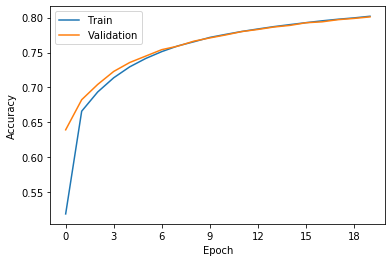

In [11]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [12]:
model_log.load_weights('lin_reg.h5')
_, score = model_log.evaluate(x_test, y_test)
print("Accuracy логической регрсии: {0:.4f}".format(score))

10000/10000 [==============================] - 1s 89us/sample - loss: 0.6135 - accuracy: 0.8010
Accuracy логической регрсии: 0.8010


#### Полносвязная нейронка

In [13]:
nn_checkpoint = ModelCheckpoint(
    'nn_model.h5',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    monitor='val_accuracy'
)

rlystopper = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

model_nn = Sequential()
model_nn.add(Dense(512, activation='relu', input_shape=(784,)))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dense(10, activation='softmax'))

model_nn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_nn = model_nn.fit(
    x_train,
    y_train,
    batch_size=500,
    validation_data=(x_test, y_test),
    callbacks=[nn_checkpoint, rlystopper],
    epochs=20
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5619 - accuracy: 0.8041 - val_loss: 0.4090 - val_accuracy: 0.8582
Epoch 2/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3798 - accuracy: 0.8647 - val_loss: 0.3655 - val_accuracy: 0.8698
Epoch 3/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3376 - accuracy: 0.8769 - val_loss: 0.3463 - val_accuracy: 0.8738
Epoch 4/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3044 - accuracy: 0.8888 - val_loss: 0.3310 - val_accuracy: 0.8773
Epoch 5/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2906 - accuracy: 0.8927 - val_loss: 0.3074 - val_accuracy: 0.8869
Epoch 6/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2693 - accuracy: 0.9015 - val_loss: 0.2970 - val_accuracy: 0.8939
Epoch 7/20
60000/60000 [==============================] 

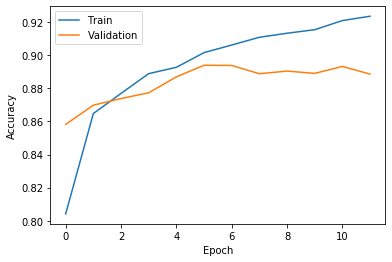

In [14]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(history_nn.history['accuracy'])
plt.plot(history_nn.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [15]:
model_nn.load_weights('nn_model.h5')
_, score = model_nn.evaluate(x_test, y_test)
print("accuracy полносвязной нейронки: {0:.4f}".format(score))

10000/10000 [==============================] - 0s 43us/sample - loss: 0.2970 - accuracy: 0.8939
accuracy полносвязной нейронки: 0.8939


Вывод: при не очень большой разнице в времени обучения качество модели заметно выше, круто, надо брать

#### Полносвязная нейронка, но больше по размеру

In [16]:
nn_checkpoint = ModelCheckpoint(
    'bigger_nn_model.h5',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    monitor='val_accuracy'
)

rlystopper = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

model_nn = Sequential()
model_nn.add(Dense(1024, activation='relu', input_shape=(784,)))
model_nn.add(Dense(784, activation='relu'))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dense(10, activation='softmax'))

model_nn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_nn = model_nn.fit(
    x_train,
    y_train,
    batch_size=500,
    validation_data=(x_test, y_test),
    callbacks=[nn_checkpoint, rlystopper],
    epochs=20
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5349 - accuracy: 0.8097 - val_loss: 0.3676 - val_accuracy: 0.8695
Epoch 2/20
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3558 - accuracy: 0.8706 - val_loss: 0.3406 - val_accuracy: 0.8738
Epoch 3/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3168 - accuracy: 0.8831 - val_loss: 0.3179 - val_accuracy: 0.8856
Epoch 4/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2881 - accuracy: 0.8939 - val_loss: 0.2963 - val_accuracy: 0.8905
Epoch 5/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2671 - accuracy: 0.9000 - val_loss: 0.3034 - val_accuracy: 0.8910
Epoch 6/20
60000/60000 [==============================] - 8s 125us/sample - loss: 0.2543 - accuracy: 0.9057 - val_loss: 0.3011 - val_accuracy: 0.8884
Epoch 7/20
60000/60000 [==========================

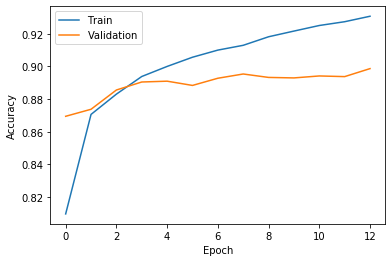

In [17]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(history_nn.history['accuracy'])
plt.plot(history_nn.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [18]:
model_nn.load_weights('bigger_nn_model.h5')
_, score = model_nn.evaluate(x_test, y_test)
print("accuracy полносвязной нейронки: {0:.4f}".format(score))

10000/10000 [==============================] - 1s 105us/sample - loss: 0.2888 - accuracy: 0.8987
accuracy полносвязной нейронки: 0.8987


Вывод: если добавить еще слой, да выкрутить количество нейронов, качество повысится, но очень незначительно. Early Stopping - круто, позволяет сэкономить ресурсы на обучении эпох, которые уже не сделают лучше.

In [19]:
CNN_X_train = x_train.as_matrix()
CNN_X_test = x_test.as_matrix()
CNN_X_train = CNN_X_train.reshape(60000, 28, 28, 1)
CNN_X_test = CNN_X_test.reshape(10000, 28, 28, 1)

/home/keddad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/keddad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [20]:
nn_checkpoint = ModelCheckpoint(
    'cnn_model.h5',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    monitor='val_accuracy'
)

rlystopper = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

CNN_model = tf.keras.models.Sequential()
CNN_model.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
CNN_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
CNN_model.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=(3,3), activation='relu'))
CNN_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
CNN_model.add(tf.keras.layers.Flatten())
CNN_model.add(tf.keras.layers.Dense(64, activation='relu'))
CNN_model.add(tf.keras.layers.Dense(10, activation='softmax'))

CNN_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = CNN_model.fit(
    CNN_X_train,
    y_train,
    batch_size=500,
    validation_data=(CNN_X_test, y_test),
    callbacks=[nn_checkpoint, rlystopper],
    epochs=20
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 256us/sample - loss: 0.8257 - accuracy: 0.7131 - val_loss: 0.5081 - val_accuracy: 0.8151
Epoch 2/20
60000/60000 [==============================] - 15s 257us/sample - loss: 0.4660 - accuracy: 0.8306 - val_loss: 0.4117 - val_accuracy: 0.8537
Epoch 3/20
60000/60000 [==============================] - 17s 279us/sample - loss: 0.4038 - accuracy: 0.8546 - val_loss: 0.3785 - val_accuracy: 0.8664
Epoch 4/20
60000/60000 [==============================] - 15s 242us/sample - loss: 0.3679 - accuracy: 0.8690 - val_loss: 0.3417 - val_accuracy: 0.8810
Epoch 5/20
60000/60000 [==============================] - 15s 257us/sample - loss: 0.3406 - accuracy: 0.8788 - val_loss: 0.3262 - val_accuracy: 0.8866
Epoch 6/20
60000/60000 [==============================] - 15s 253us/sample - loss: 0.3244 - accuracy: 0.8848 - val_loss: 0.3187 - val_accuracy: 0.8876
Epoch 7/20
60000/60000 [====================

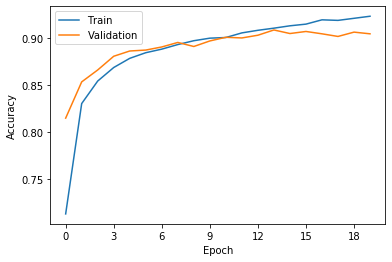

In [21]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [24]:
CNN_model.load_weights('cnn_model.h5')
_, score = CNN_model.evaluate(CNN_X_test, y_test)
print("accuracy CNN нейронки: {0:.4f}".format(score))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

accuracy CNN нейронки: 0.9090


Вывод: CNN обучается медленнее всего, но обспечивает наибольшую производительность. Вкусняшка.